In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data 
iris = pd.read_csv('/Users/carrie/IronHack/DAFT_NOV_21_01/module_3/3. Data-Cleaning-Challenge/iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [4]:
iris.duplicated().any()

True

In [5]:
iris.drop_duplicates()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
# replace nan value with the interploate value 
iris_n = iris.interpolate(inplace=False)
iris_n[7:12]['petal_width_cm'] = round(iris_n[7:12]['petal_width_cm'],1)
iris_n[7:12]

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.3,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.1,Iris-setosa


In [8]:
iris_n['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [9]:
iris_n['class'].loc[(iris_n['class'] == 'versicolor')] = 'Iris-versicolor'
iris_n['class'].loc[(iris_n['class'] == 'Iris-setossa')] = 'Iris-setosa'
iris_n['class'].value_counts()

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [10]:
iris_n.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.202000
std,1.312781,0.433123,1.764420,0.765486
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


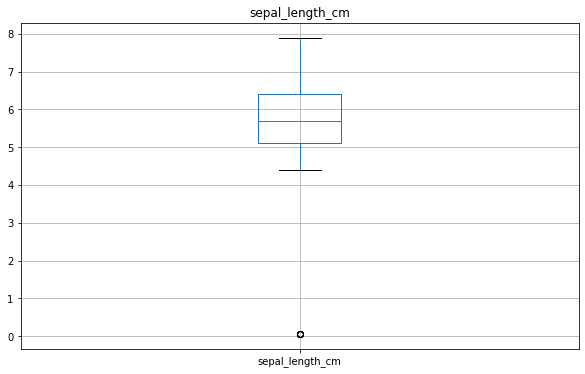

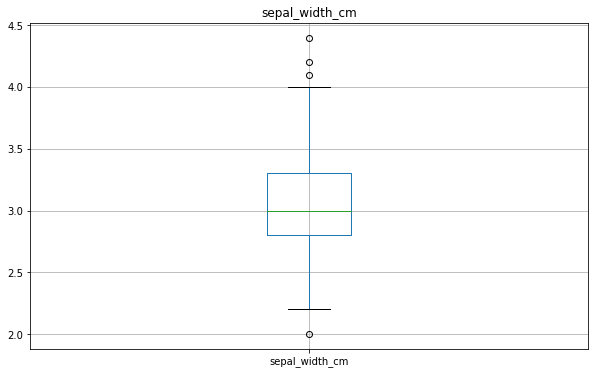

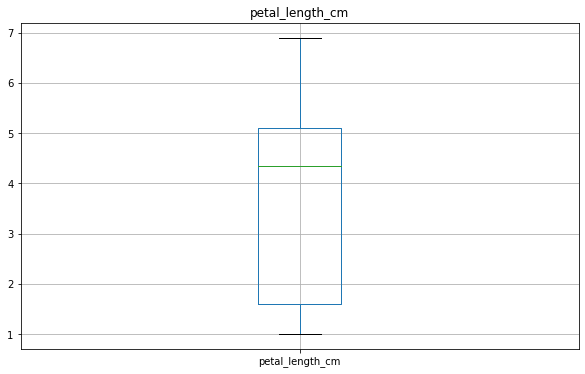

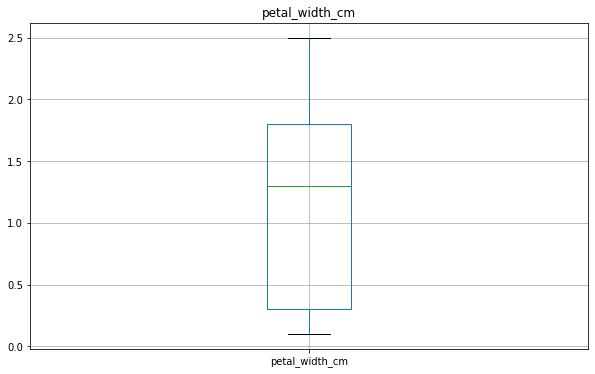

In [11]:
num_df = iris_n.select_dtypes(exclude=['object'])

for col in num_df:
    plt.figure(figsize=(10, 6))
    iris_n.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [12]:
# rectify the mis-typed value in sepal_length_cm col
iris_n.loc[iris['sepal_length_cm'] < 1, 'sepal_length_cm'] = iris_n['sepal_length_cm']*100

In [27]:
# after checking the value of sepal_width_cm, i decided to keep it since it's not super far ways from other data
Q1 = iris_n['sepal_width_cm'].quantile(0.25)
Q3 = iris_n['sepal_width_cm'].quantile(0.75)
IQR = Q3 - Q1

iris_n[(iris_n['sepal_width_cm'] < (Q1 - 1.5 * IQR)) |(iris_n['sepal_width_cm'] > (Q3 + 1.5 * IQR))]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [13]:
iris_n.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.838667,3.054667,3.758667,1.202000
std,0.804416,0.433123,1.764420,0.765486
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

# to have a dict of class & encode 
lable.fit(iris_n['class'])
label_name_mapping = dict(zip(lable.classes_, lable.transform(lable.classes_)))
print(label_name_mapping)

#Encode class col
iris_n['class']=lable.fit_transform(iris_n['class'])
iris_n

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,2.3,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
iris_n.to_csv('/Users/carrie/IronHack/DAFT_NOV_21_01/module_3/3. Data-Cleaning-Challenge/iris_clean.csv')

<AxesSubplot:ylabel='class'>

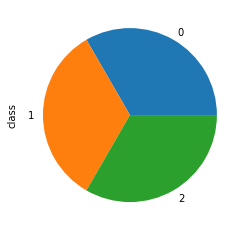

In [71]:
iris_n['class'].value_counts().plot.pie()

<AxesSubplot:>

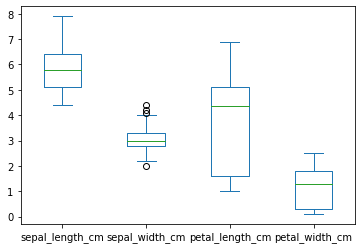

In [39]:
iris_n.loc[:, iris_n.columns != 'class'].plot.box()

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

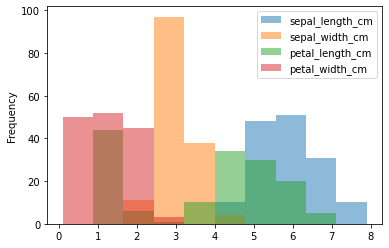

In [34]:
plt.figure()
iris_n.loc[:, iris_n.columns != 'class'].plot.hist(alpha=0.5)

<AxesSubplot:xlabel='petal_width_cm', ylabel='petal_length_cm'>

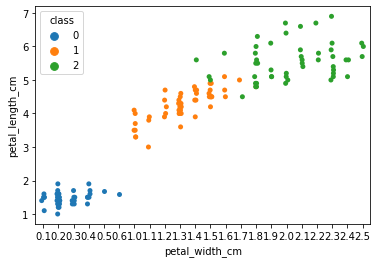

In [60]:
sns.stripplot(x="petal_width_cm", y="petal_length_cm", hue="class", data=iris_n)

<AxesSubplot:xlabel='sepal_width_cm', ylabel='sepal_length_cm'>

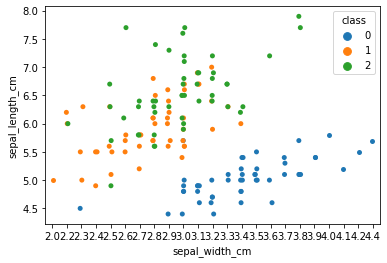

In [58]:
sns.stripplot(x="sepal_width_cm", y="sepal_length_cm", hue="class", data=iris_n)

<AxesSubplot:>

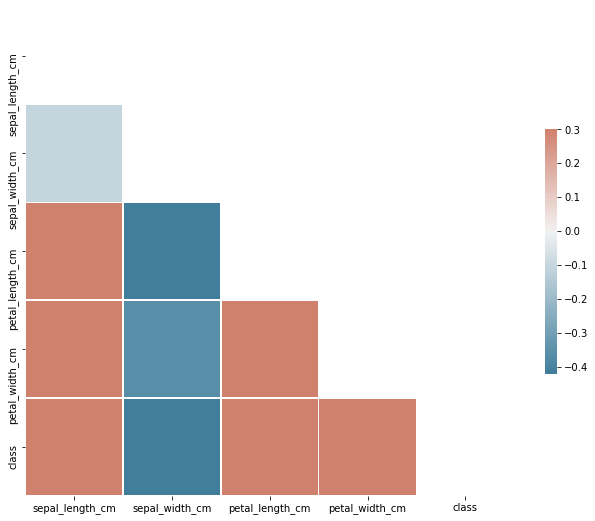

In [72]:
corr = iris_n.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})